# day 25

https://adventofcode.com/2018/day/25

In [1]:
import os

import eri.logging as logging

In [2]:
FNAME = os.path.join('data', 'day25.txt')

LOGGER = logging.getLogger('day25')
logging.configure()

## part 1

### problem statement:

> The reindeer's symptoms are getting worse, and neither you nor the white-bearded man have a solution. At least the reindeer has a warm place to rest: a small bed near where you're sitting.
> 
> As you reach down, the reindeer looks up at you, accidentally bumping a button on your wrist-mounted device with its nose in the process - a button labeled "help".
> 
> "Hello, and welcome to the Time Travel Support Hotline! If you are lost in time and space, press 1. If you are trapped in a time paradox, press 2. If you need help caring for a sick reindeer, press 3. If you--"
> 
> Beep.
> 
> A few seconds later, you hear a new voice. "Hello; please state the nature of your reindeer." You try to describe the situation.
> 
> "Just a moment, I think I can remotely run a diagnostic scan." A beam of light projects from the device and sweeps over the reindeer a few times.
> 
> "Okay, it looks like your reindeer is very low on magical energy; it should fully recover if we can fix that. Let me check your timeline for a source.... Got one. There's actually a powerful source of magical energy about 1000 years forward from you, and at roughly your position, too! It looks like... hot chocolate? Anyway, you should be able to travel there to pick some up; just don't forget a mug! Is there anything else I can help you with today?"
> 
> You explain that your device isn't capable of going forward in time. "I... see. That's tricky. Well, according to this information, your device should have the necessary hardware to open a small portal and send some hot chocolate back to you. You'll need a list of fixed points in spacetime; I'm transmitting it to you now."
> 
> "You just need to align your device to the constellations of fixed points so that it can lock on to the destination and open the portal. Let me look up how much hot chocolate that breed of reindeer needs."
> 
> "It says here that your particular reindeer is-- this can't be right, it says there's only one like that in the universe! But THAT means that you're--" You disconnect the call.
> 
> The list of fixed points in spacetime (your puzzle input) is a set of four-dimensional coordinates. To align your device, acquire the hot chocolate, and save the reindeer, you just need to find the number of constellations of points in the list.
> 
> Two points are in the same constellation if their manhattan distance apart is no more than 3 or if they can form a chain of points, each a manhattan distance no more than 3 from the last, between the two of them. (That is, if a point is close enough to a constellation, it "joins" that constellation.) For example:
> 
>      0,0,0,0
>      3,0,0,0
>      0,3,0,0
>      0,0,3,0
>      0,0,0,3
>      0,0,0,6
>      9,0,0,0
>     12,0,0,0
> 
> In the above list, the first six points form a single constellation: 0,0,0,0 is exactly distance 3 from the next four, and the point at 0,0,0,6 is connected to the others by being 3 away from 0,0,0,3, which is already in the constellation. The bottom two points, 9,0,0,0 and 12,0,0,0 are in a separate constellation because no point is close enough to connect them to the first constellation. So, in the above list, the number of constellations is 2. (If a point at 6,0,0,0 were present, it would connect 3,0,0,0 and 9,0,0,0, merging all of the points into a single giant constellation instead.)
> 
> In this example, the number of constellations is 4:
> 
>     -1,2,2,0
>     0,0,2,-2
>     0,0,0,-2
>     -1,2,0,0
>     -2,-2,-2,2
>     3,0,2,-1
>     -1,3,2,2
>     -1,0,-1,0
>     0,2,1,-2
>     3,0,0,0
>
> In this one, it's 3:
> 
>     1,-1,0,1
>     2,0,-1,0
>     3,2,-1,0
>     0,0,3,1
>     0,0,-1,-1
>     2,3,-2,0
>     -2,2,0,0
>     2,-2,0,-1
>     1,-1,0,-1
>     3,2,0,2
>
> Finally, in this one, it's 8:
> 
>     1,-1,-1,-2
>     -2,-2,0,1
>     0,2,1,3
>     -2,3,-2,1
>     0,2,3,-2
>     -1,-1,1,-2
>     0,-2,-1,0
>     -2,2,3,-1
>     1,2,2,0
>     -1,-2,0,-2
>
> The portly man nervously strokes his white beard. It's time to get that hot chocolate.
> 
> How many constellations are formed by the fixed points in spacetime?

#### loading data

In [4]:
def load_data(fname=FNAME):
    with open(fname) as fp:
        return fp.read()

In [24]:
import pandas as pd

def parse(s):
    return pd.DataFrame([
        [int(_) for _ in line.strip().split(',')]
        for line in s.strip().split('\n')
    ], columns=['x', 'y', 'z', 't'])

2019-01-12 11:21:55,527 DEBUG    [matplotlib.wrapper:409] $HOME=/home/zlamberty
2019-01-12 11:21:55,529 DEBUG    [matplotlib.wrapper:409] matplotlib data path /home/zlamberty/anaconda3/envs/bs/lib/python3.6/site-packages/matplotlib/mpl-data
2019-01-12 11:21:55,537 DEBUG    [matplotlib.rc_params_from_file:1156] loaded rc file /home/zlamberty/anaconda3/envs/bs/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
2019-01-12 11:21:55,541 DEBUG    [matplotlib.<module>:1879] matplotlib version 2.2.3
2019-01-12 11:21:55,542 DEBUG    [matplotlib.<module>:1880] interactive is False
2019-01-12 11:21:55,544 DEBUG    [matplotlib.<module>:1881] platform is linux


2019-01-12 11:21:55,550 DEBUG    [matplotlib.<module>:1882] loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'google', 'google.cloud', 'google.logging', 'mpl_toolkits', 'sphinxcontrib', 'zope', 'runpy', '

In [27]:
parse(test_data).head()

,x,y,z,t
0,0,0,0,0
1,3,0,0,0
2,0,3,0,0
3,0,0,3,0
4,0,0,0,3


In [28]:
parse(load_data()).head()

,x,y,z,t
0,-6,-5,7,7
1,-4,5,-1,3
2,-1,-6,-7,8
3,-1,-1,-4,-4
4,-3,-2,2,-4


In [31]:
def manhattan(rec, others):
    return (others - rec).abs().sum(axis=1)

In [32]:
df = parse(test_data)
manhattan(df.iloc[0], df)

0     0
1     3
2     3
3     3
4     3
5     6
6     9
7    12
dtype: int64

In [33]:
df = parse(test_data)
manhattan(df.iloc[0], df) <= 3

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7    False
dtype: bool

#### function def

In [331]:
XYZT = ['x', 'y', 'z', 't']
def q_1(data):
    df = parse(data)
    df.loc[:, 'cluster'] = None
    next_cluster_ind = 0
    for (idx, rec) in tqdm.tqdm_notebook(df.iterrows(), total=df.shape[0]):
        in_same_cluster = manhattan(rec[XYZT], df[XYZT]) <= 3
        
        # which clusters can be tied together this way?
        overlapping_clusters = df[in_same_cluster].cluster.dropna().unique()
        
        if overlapping_clusters.size > 0:
            cluster_ind = overlapping_clusters.min()

            # there *may* be nulls in this set; make sure they're all 
            # assigned to the same thing
            df.loc[
                (in_same_cluster) | df.cluster.isin(overlapping_clusters), 
                'cluster'
            ] = cluster_ind
        else:
            # no other clusters, assign the next available
            df.loc[in_same_cluster, 'cluster'] = next_cluster_ind
            next_cluster_ind += 1
    
    return df.cluster.nunique()

#### tests

In [332]:
test_0 = """0,0,0,0
 3,0,0,0
 0,3,0,0
 0,0,3,0
 0,0,0,3
 0,0,0,6
 9,0,0,0
12,0,0,0"""
val_0 = 2

In [333]:
test_1 = """-1,2,2,0
0,0,2,-2
0,0,0,-2
-1,2,0,0
-2,-2,-2,2
3,0,2,-1
-1,3,2,2
-1,0,-1,0
0,2,1,-2
3,0,0,0"""
val_1 = 4

In [334]:
test_2 = """1,-1,0,1
2,0,-1,0
3,2,-1,0
0,0,3,1
0,0,-1,-1
2,3,-2,0
-2,2,0,0
2,-2,0,-1
1,-1,0,-1
3,2,0,2"""
val_2 = 3

In [335]:
test_3 = """1,-1,-1,-2
-2,-2,0,1
0,2,1,3
-2,3,-2,1
0,2,3,-2
-1,-1,1,-2
0,-2,-1,0
-2,2,3,-1
1,2,2,0
-1,-2,0,-2"""
val_3 = 8

In [336]:
def test_q_1():
    LOGGER.setLevel(logging.DEBUG)
    assert q_1(test_0) == val_0
    assert q_1(test_1) == val_1
    assert q_1(test_2) == val_2
    assert q_1(test_3) == val_3
    LOGGER.setLevel(logging.INFO)

In [337]:
test_q_1()

online solution

In [295]:
import networkx as nx


def get_data():
    with open("data/day25.txt", "r") as f:
        data = f.read().rstrip()

    return [tuple(map(int, line.split(","))) for line in data.splitlines()]


def mandist(s, t):
    return sum(abs(x - y) for x, y in zip(s, t))


def make_graph(points):
    g = nx.Graph()
    for point in points:
        for otherpoint in points:
            if mandist(point, otherpoint) <= 3:
                g.add_edge(point, otherpoint)
    return g


def part1(points):
    g = make_graph(points)
    return nx.number_connected_components(g)

In [297]:
g = make_graph(points)

In [306]:
import matplotlib.pyplot as plt

In [307]:
%matplotlib inline

2019-01-12 12:03:09,700 DEBUG    [matplotlib.backends.pylab_setup:90] backend module://ipykernel.pylab.backend_inline version unknown


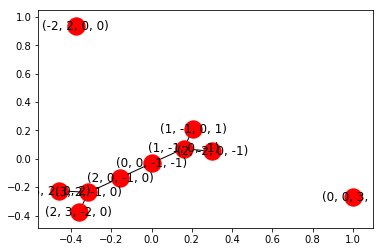

In [338]:
nx.draw_networkx(g)

#### answer

In [339]:
q_1(load_data())

390

## part 2

### problem statement:

#### function def

In [ ]:
def q_2(data):
    return False

#### tests

In [ ]:
def test_q_2():
    LOGGER.setLevel(logging.DEBUG)
    assert q_2(test_data) == True
    LOGGER.setLevel(logging.INFO)

In [ ]:
test_q_2()

#### answer

In [ ]:
q_2(load_data())

fin